In [ ]:
#question1:a

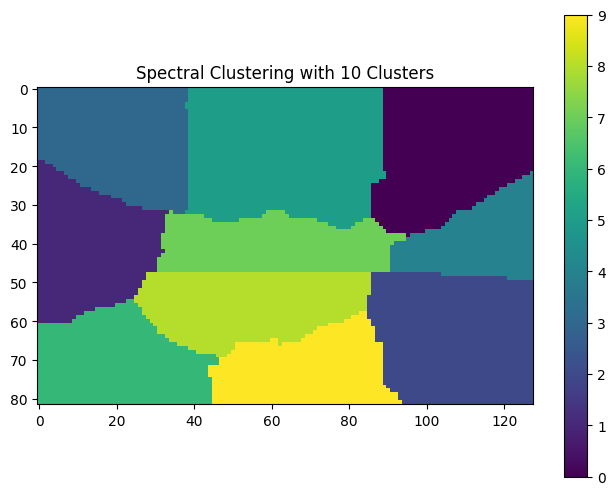

In [ ]:
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, diags

def construct_sparse_affinity_matrix(image, sigma=0.1):
    rows, cols, _ = image.shape
    N = rows * cols
    flat_image = image.reshape((N, 3))
    A_data = []
    A_rows = []
    A_cols = []

    for i in range(N):
        if i % cols != cols - 1:
            diff = flat_image[i] - flat_image[i + 1]
            A_data.append(np.exp(-np.linalg.norm(diff) ** 2 / sigma ** 2))
            A_rows.append(i)
            A_cols.append(i + 1)
        if i < (rows - 1) * cols:
            diff = flat_image[i] - flat_image[i + cols]
            A_data.append(np.exp(-np.linalg.norm(diff) ** 2 / sigma ** 2))
            A_rows.append(i)
            A_cols.append(i + cols)


    A = csr_matrix((A_data, (A_rows, A_cols)), shape=(N, N))
    A = A + A.T


    A = A - diags(A.diagonal())
    return A


image_path = '/content/scene2.jpg'
image = imread(image_path) / 255.0
image = resize(image, (82, 128), anti_aliasing=True)

A = construct_sparse_affinity_matrix(image)

sc = SpectralClustering(n_clusters=10, affinity='precomputed', n_init=100, assign_labels='discretize', random_state=42)
labels = sc.fit_predict(A)

label_image = labels.reshape(82, 128)


plt.figure(figsize=(8, 6))
plt.imshow(label_image, cmap='viridis', interpolation='none')
plt.colorbar(ticks=np.arange(10))
plt.title('Spectral Clustering with 10 Clusters')
plt.show()


In [ ]:
#question 1b

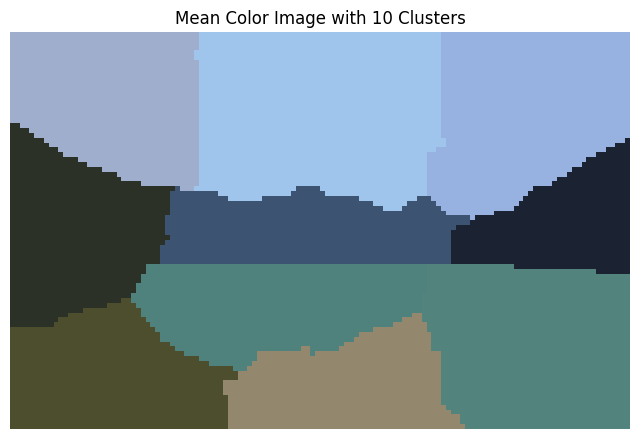

In [ ]:

def replace_with_cluster_mean(image, labels):
    rows, cols, channels = image.shape
    flat_image = image.reshape((rows * cols, channels))
    label_image = labels.flatten()
    mean_colors = np.zeros((np.max(label_image) + 1, channels))


    for i in range(len(mean_colors)):
        mean_colors[i] = np.mean(flat_image[label_image == i], axis=0)

    new_image = mean_colors[label_image].reshape((rows, cols, channels))

    return new_image

mean_color_image_10 = replace_with_cluster_mean(image, label_image)


plt.figure(figsize=(8, 6))
plt.imshow(mean_color_image_10, interpolation='none')
plt.title('Mean Color Image with 10 Clusters')
plt.axis('off')
plt.show()


In [ ]:
#question 1 part c

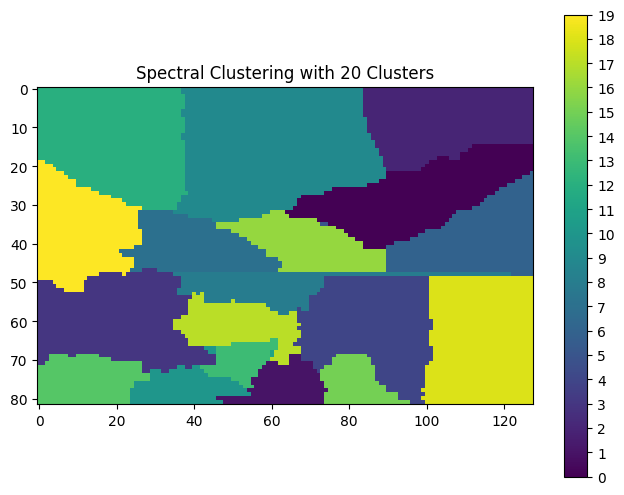

In [ ]:


def construct_sparse_affinity_matrix(image, sigma=0.1):
    rows, cols, _ = image.shape
    N = rows * cols
    flat_image = image.reshape((N, 3))
    A_data = []
    A_rows = []
    A_cols = []


    for i in range(N):
        if i % cols != cols - 1:
            diff = flat_image[i] - flat_image[i + 1]
            A_data.append(np.exp(-np.linalg.norm(diff) ** 2 / sigma ** 2))
            A_rows.append(i)
            A_cols.append(i + 1)
        if i < (rows - 1) * cols:
            diff = flat_image[i] - flat_image[i + cols]
            A_data.append(np.exp(-np.linalg.norm(diff) ** 2 / sigma ** 2))
            A_rows.append(i)
            A_cols.append(i + cols)

    A = csr_matrix((A_data, (A_rows, A_cols)), shape=(N, N))
    A = A + A.T


    A = A - diags(A.diagonal())
    return A

image_path = '/content/scene2.jpg'
image = imread(image_path) / 255.0
image = resize(image, (82, 128), anti_aliasing=True)

A = construct_sparse_affinity_matrix(image)

sc = SpectralClustering(n_clusters=20, affinity='precomputed', n_init=100, assign_labels='discretize', random_state=42)
labels = sc.fit_predict(A)

label_image = labels.reshape(82, 128)


plt.figure(figsize=(8, 6))
plt.imshow(label_image, cmap='viridis', interpolation='none')
plt.colorbar(ticks=np.arange(20))
plt.title('Spectral Clustering with 20 Clusters')
plt.show()


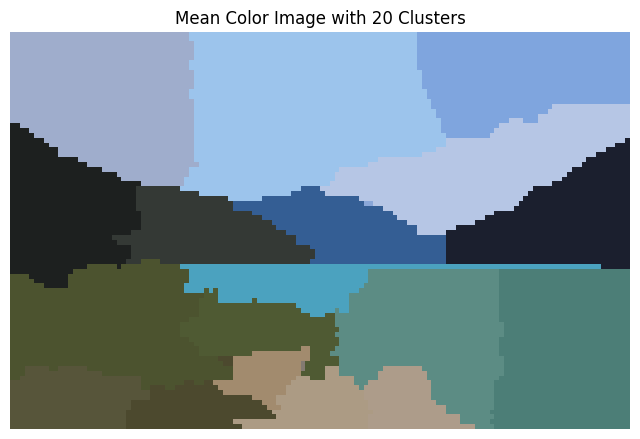

In [ ]:

def replace_with_cluster_mean(image, labels):
    rows, cols, channels = image.shape
    flat_image = image.reshape((rows * cols, channels))
    label_image = labels.flatten()
    mean_colors = np.zeros((np.max(label_image) + 1, channels))


    for i in range(len(mean_colors)):
        mean_colors[i] = np.mean(flat_image[label_image == i], axis=0)


    new_image = mean_colors[label_image].reshape((rows, cols, channels))

    return new_image

mean_color_image_20 = replace_with_cluster_mean(image, label_image)


plt.figure(figsize=(8, 6))
plt.imshow(mean_color_image_20, interpolation='none')
plt.title('Mean Color Image with 20 Clusters')
plt.axis('off')
plt.show()
